# Simple example with properties
This notebook demonstrates how to manage networks with properties stored on the stations/nodes, as, for example, dimensions of the conduits.

In [1]:
import karstnet as kn

In [2]:
kn.test_kn()

test ok
relance ok


# Simple tree

We first define a dictionnary of nodes. Each node is defined by a key (here an integer ID number) and positions in 2D. 
If a property has to be managed, the Z coordinate MUST be informed with a 0 value. A property can only be taken into account if it is the fourth value in the node definition.
The second structure is a list of edges. Each edge is a tuple containing a pair of nodes.  



 This network contains  1  connected components



ValueError: 'vertices' must be a 2D list or array with shape Nx2

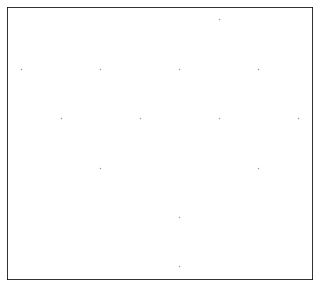

In [3]:
# The dictionary of nodes of the graph
nodes = {1 : (0, 0, 0, 1), 2 : (0, 1, 0, 1), 3 : (-1, 2, 0, 1), 4 : (1, 2, 0, 1),
         5 : (-1.5, 3, 0, 1), 6 : (-0.5, 3, 0, 1), 7 : (0.5, 3, 0, 1), 8 : (1.5, 3, 0, 1),
         9 : (-2, 4, 0, 1), 10 : (-1, 4, 0, 1), 11 : (0, 4, 0, 1), 12 : (1, 4, 0, 1), 13 : (0.5, 5, 0, 1)}

# The list of edges connecting the nodes
edges = [(1, 2), (2, 3), (2, 4), (3, 5), (3, 6), (4, 7), 
         (4, 8), (5, 9), (5, 10), (7, 11), (7, 12), (7, 13)]


# Creation of an instance k of the KGraph object using karstnet
k = kn.KGraph(edges, nodes)

# Plot the graph in 2D for checking
k.plot()

# Computes the statistics of the graph
results = k.characterize_graph( verbose = True )

# The results are stored in a dictionnary. To extract the statistics of 
# interest use the name of the statistics as key. For example:
print("The mean degree is ", results["mean degree"])

### Compute stereo (P. Vernant's 2019 contribution) 
This new (dec. 2019) functionnality uses the mplstereonet library (https://github.com/joferkington/mplstereonet) in order to reproduce the drawings proposed in Collon et al. 2017 (doi:10.1016/j.geomorph.2017.01.034)

d:\codes_opensource\karstnet\karstnet\base.py:332: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


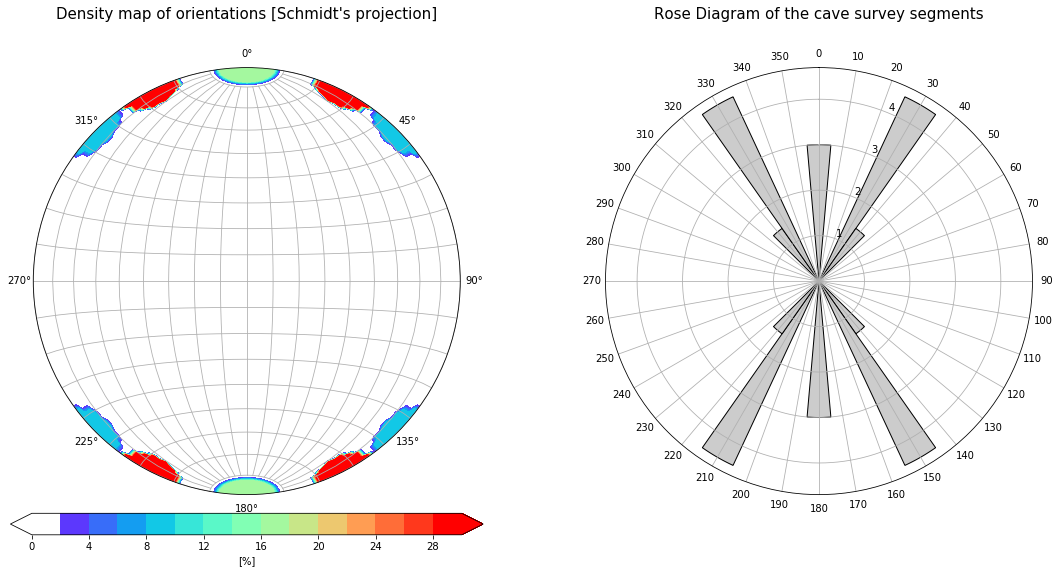

In [5]:
k.stereo()

## Computing Howard's parameters

All basic networks analysis (number of edges, connected components, cycles, extremities and junction nodes) and the three Howard's parameters (alpha, beta, gamma) as defined in : Howard, A. D., Keetch, M. E., & Vincent, C. L. (1970). Topological and geometrical properties of braided patterns. Water Resources Research, 6(6), 1674–1688, are available thanks to the Karsnet function basic_analysis() :


In [6]:
k.basic_analysis()


 This network contains : 13  nodes (stations)
 12 edges
 1  connected components
 0  cycles
 8 are extremity nodes (entries or exits) and 5 are junction nodes

Howard's parameter are (Howard, 1970) :  
 alpha:  0.0 
 beta 0.9230769230769231 
 gamma 0.36363636363636365


# Complete graph

Following the same idea as above, we construct below a complete graph: all nodes are connected to all nodes. Such a graph has no central point dominance, no variation in degrees, and its average shortest path length is 1. Let's check that this is correct.


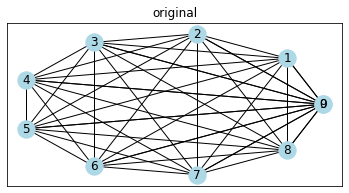

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd
--------------------------------------
               mean length = 1.386
                 cv length = 0.380
            length entropy = 0.751
                tortuosity = 1.000
       orientation entropy = 0.971
                      aspl = 1.000
                       cpd = 0.000
               mean degree = 9.000
                 cv degree = 0.000
 correlation vertex degree = 1.000
--------------------------------------


In [5]:
# Use numpy module for computing the positions of the nodes
import numpy as np

# Construct the nodes and edges
# Number of nodes
npt = 10
nodes = {}
edges = []

for i in range(npt):
    angle = 2 * np.pi * i / (npt - 1) 
    nodes[i] = (np.cos(angle), np.sin(angle))  

for i in range(npt):
    for j in range(npt):
        if i != j:
            edges.append((i, j))

# Creates the graph            
k = kn.KGraph( edges, nodes)

# Plot it for verification
k.plot2()

# And computes the statistics
r = k.characterize_graph( verbose=True )

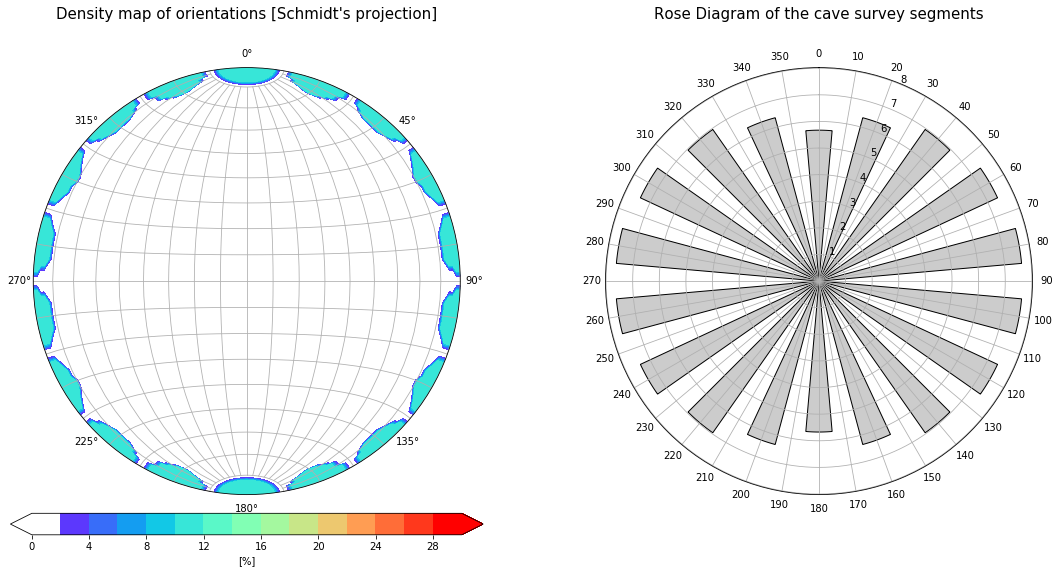

In [6]:
# Draw stereos
k.stereo()

# Simple tree with nodes of degree 2 and looping branch

This exemple, very similar to the first one, introduces a simple 2d graph with a looping branch (nodes 5-9-10), a node of degree 2 (node 14) and different cycles. This permits to test : 
* the computation of tortuosity in case of looping branch (which should be ignored as the real distance is nul between the startin and ending point)
* the functionning of graph simplification (node of degree 2 should disappear)


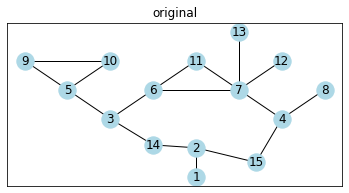

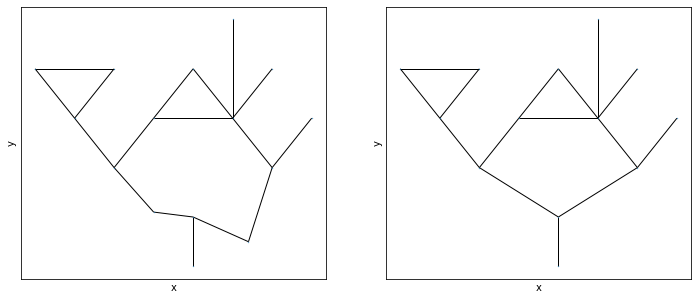

Computing:
 - mean length,cv length,length entropy,mean tortuosity

 - orientation entropy,aspl,cpd,md,cv degree,cvd
--------------------------------------
               mean length = 1.583
                 cv length = 0.437
            length entropy = 0.668
                tortuosity = 1.183
       orientation entropy = 0.652
                      aspl = 2.667
                       cpd = 0.328
               mean degree = 2.308
                 cv degree = 0.492
 correlation vertex degree = -0.447
--------------------------------------
The mean degree is  2.3076923076923075


In [9]:
# The dictionary of nodes of the graph
nodes = {1 : (0, 0), 2 : (0, 1), 3 : (-1, 2), 4 : (1, 2),
         5 : (-1.5, 3), 6 : (-0.5, 3), 7 : (0.5, 3), 8 : (1.5, 3),
         9 : (-2, 4), 10 : (-1, 4), 11 : (0, 4), 12 : (1, 4), 13 : (0.5, 5),
         14 : (-0.5,1.1), 15 : (0.7, 0.5)}

# The list of edges connecting the nodes
edges = [(1, 2), (2, 15), (15,4), (3, 5), (3, 6), (4, 7),(6,7), (6,11),
         (4, 8), (5, 9), (5, 10), (7, 11), (7, 12), (7, 13),(2,14),(14,3),(9,10)]


# Creation of an instance k of the KGraph object using karstnet
k = kn.KGraph(edges, nodes)

#Plot 2d graph for checking
k.plot2()
# Plot the original and simplified graphs in 2D top view for checking the simplification
k.plot()

# Computes the statistics of the graph
results = k.characterize_graph( verbose = True )

# The results are stored in a dictionnary. To extract the statistics of 
# interest use the name of the statistics as key. For example:
print("The mean degree is ", results["mean degree"])

Let's exploit some possibilities of Networkx library : 

In [20]:
#Compute the number of nodes
nb_nodes = k.graph.number_of_nodes()
nb_nodes_simple = k.graph_simpl.number_of_nodes()
print ("Nombre de noeud du graphe complet : ", nb_nodes,
      "\nNombre de noeud du graphe réduit : ", nb_nodes_simple)

Nombre de noeud du graphe complet :  15 
Nombre de noeud du graphe réduit :  13
